# Visualization Adult

The sole purpose of this notebook is to visualize conducted experiments

In [2]:
import json 

def get_exp_results(exp_name): 
    """
    Loads json with experimental results
    """
    path = f"experiments/results/{exp_name}.json"
    with open(path, 'r') as openfile:
            results = json.load(openfile)
    return results

In [3]:
import pandas as pd
def print_exp_info(exp_name, show_results=True):
    info = get_exp_results(exp_name)
    for k, v in info.items():
        if isinstance(v, str):
            print(f"{k}:::{v[:50]}")
        elif isinstance(v, list):
            if show_results:
                for i, elem in enumerate(v):
                    print(f"{k}#{i}:::{elem[:50]}")
        else:
            print(f"{k}:::{v}")
                  

In [4]:
import matplotlib.pyplot as plt

def visualize_2d_results(exp_name, labels=["accuracy", "fairness"], inv=True):
    info = get_exp_results(exp_name)
    result = info["result"]
    if inv:
        result = result[::-1]
        labels = labels[::-1]
    fig = plt.figure(figsize = (10, 8))
    plt.plot(result[0], result[1], label = "Pareto Curve", color = 'purple')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend()
    plt.show()
    

In [5]:
from experiments.exp_tools import aggregate_result

In [6]:
def collect_exp_results(exp_name, task_num):
    aggregate_result(f"experiments/results/raw_results/{exp_name}/", f"experiments/results/{exp_name}.json", task_num)

# Group fairness vs Acc (2d)

## Experiment 1

In [29]:
print_exp_info("exp1")

name:::exp1
descr:::Group Fairness vs Acc, linear grid, 10
result#0:::[0.7551890034364261, 0.8125429553264605, 0.8141237113402061, 0.8160481099656357, 0.8178006872852233, 0.8184192439862542, 0.8175257731958763, 0.8176975945017182, 0.8171821305841924, 0.8169072164948453]
result#1:::[1.0, 0.9823751641344183, 0.9797008670193659, 0.9752755678357083, 0.9709089159080531, 0.96485992615418, 0.9584019401483452, 0.9516339223805084, 0.9442590084982603, 0.9373309057194283]


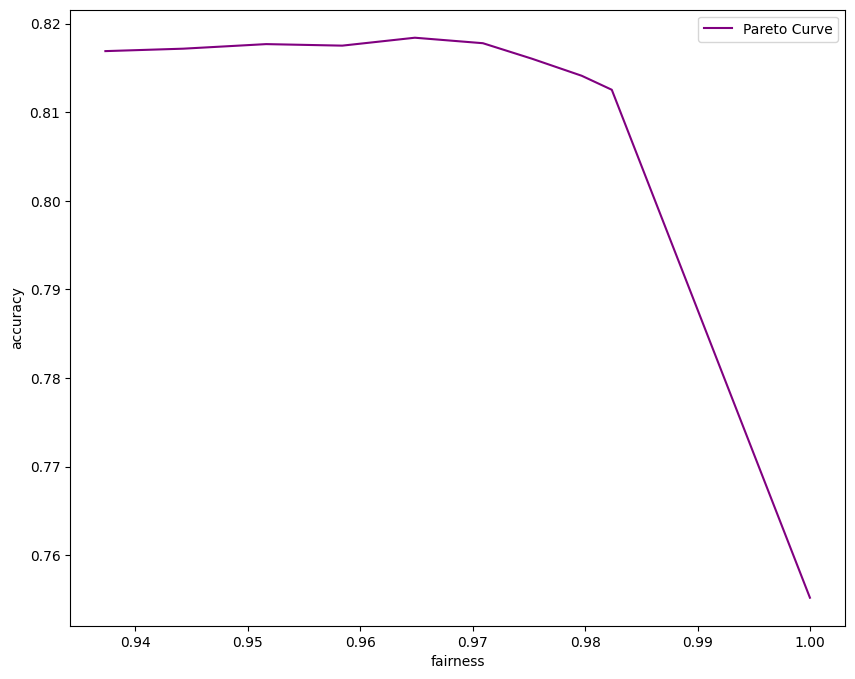

In [26]:
visualize_2d_results("exp1")

## Exp 2 (custom grid)

In [30]:
#grid = [0, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.75, 1]

In [33]:
print_exp_info("exp2")

name:::exp1
descr:::Group Fairness vs Acc, custom grid, 10
result#0:::[0.7551890034364261, 0.8095876288659793, 0.8094158075601374, 0.8120962199312715, 0.8132646048109965, 0.8140549828178694, 0.8159106529209621, 0.818041237113402, 0.8172852233676975, 0.8169072164948453]
result#1:::[1.0, 0.9831720985574208, 0.9840738295639871, 0.9825436632097405, 0.9816888100922657, 0.9802324311101263, 0.97672884362774, 0.9680938199889766, 0.9532905760181134, 0.9373309057194283]


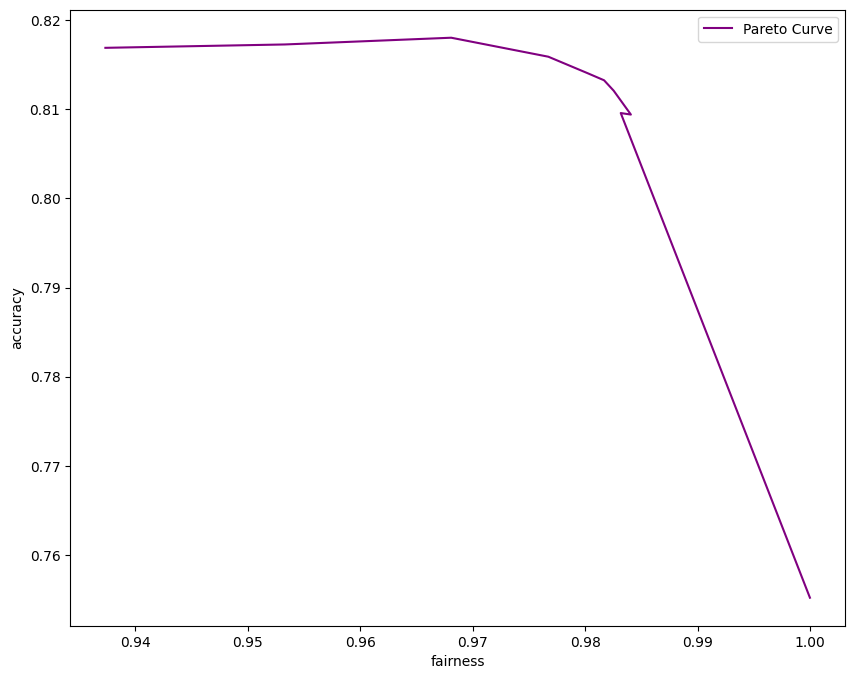

In [34]:
visualize_2d_results("exp2")

## Experiment 3 (Gr Fairess vs Acc) [INVALID, REDO WHEN CLUSTER AVAILABLE]

In [6]:
aggregate_result("experiments/results/raw_results/exp3/", "experiments/results/exp3.json", 100)

In [7]:
print_exp_info("exp3")

name:::exp1
descr:::Group Fairness vs Acc with 100 grid size
result#0:::[0.7551890034364261, 0.8094158075601374, 0.8096907216494845, 0.8101030927835051, 0.8103780068728522, 0.8105841924398625, 0.8107903780068728, 0.8107216494845361, 0.8112027491408934, 0.8117525773195876, 0.8121993127147766, 0.8125429553264605, 0.8127835051546392, 0.8130584192439863, 0.813127147766323, 0.8132302405498282, 0.8132646048109965, 0.8134020618556701, 0.8136769759450171, 0.8138831615120274, 0.8140206185567009, 0.8140206185567009, 0.8141237113402061, 0.8142611683848797, 0.8142611683848797, 0.81446735395189, 0.814914089347079, 0.8152577319587628, 0.8155670103092783, 0.8157731958762886, 0.8160137457044673, 0.8160481099656357, 0.8160137457044673, 0.8160481099656357, 0.816529209621993, 0.8167697594501717, 0.8169759450171821, 0.8172164948453607, 0.8171821305841924, 0.817147766323024, 0.8174226804123711, 0.8172164948453607, 0.8173883161512027, 0.8176632302405498, 0.8178006872852233, 0.8181443298969071, 0.81817869415

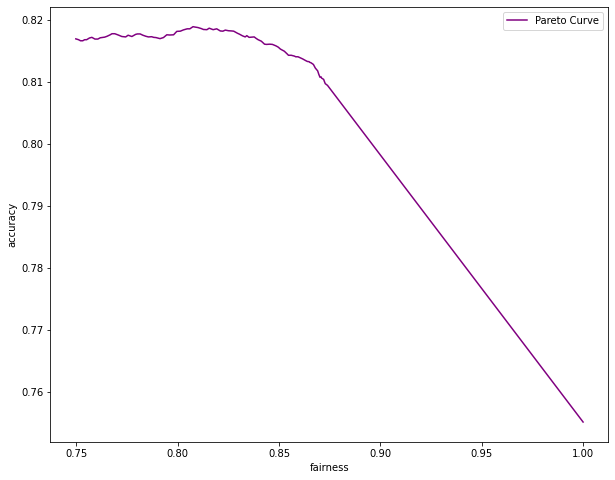

In [8]:
visualize_2d_results("exp3")

# Ind Fairness vs Acc, 2d

## Experiment 8 (ind fairness vs acc, linear grid, 10)

In [7]:
print_exp_info("exp8")

name:::exp1
descr:::Ind Fairness vs Acc with 10 grid size
result#0:::[0.4938487972508591, 0.5205154639175258, 0.7377319587628867, 0.766872852233677, 0.7819243986254295, 0.7944329896907216, 0.8089690721649484, 0.8188316151202748, 0.8188659793814432, 0.8169072164948453]
result#1:::[0.591115054209501, 0.6267787261728003, 0.922454683654659, 0.9782567045473964, 0.9691643526117639, 0.9446569277612864, 0.9009100450483117, 0.8540267570191078, 0.8098673359249343, 0.7739556331495804]


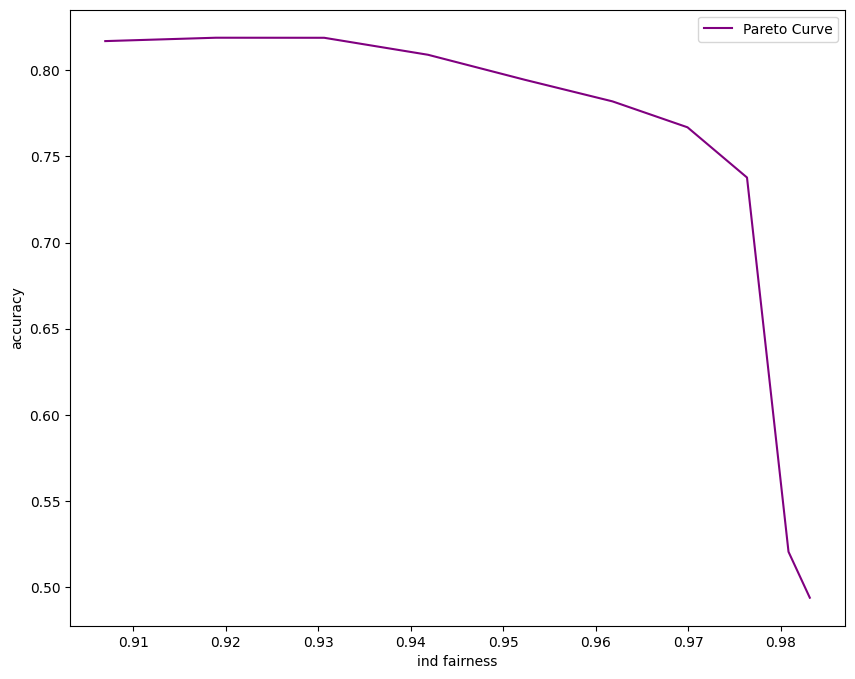

In [9]:
visualize_2d_results("exp8", labels=["accuracy", "ind fairness"]) # OLD MEASURE: soft labels

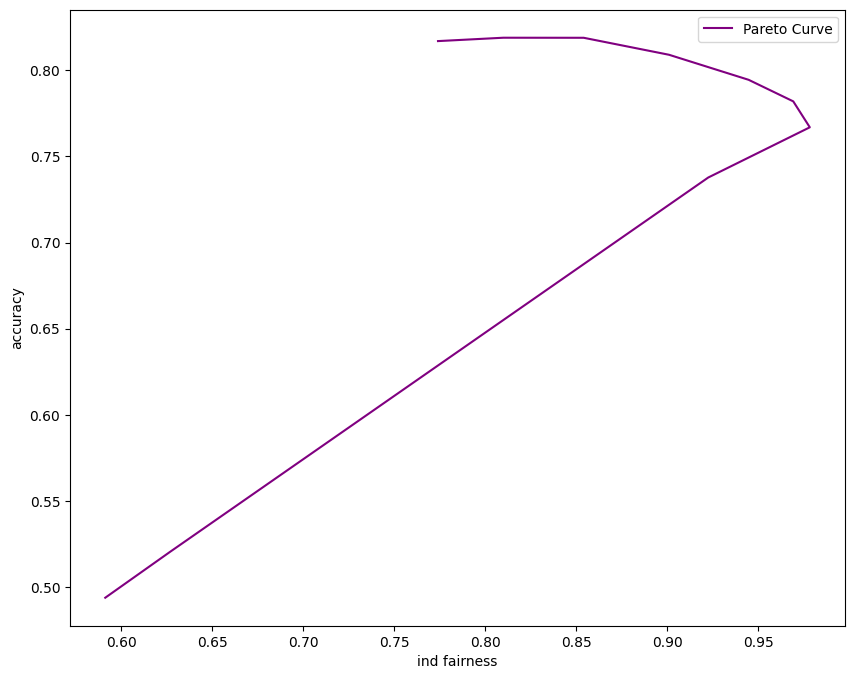

In [9]:
visualize_2d_results("exp8", labels=["accuracy", "ind fairness"]) # NEW MEASURE: hard labels

## Experiment 9 (ind vs acc, custom grid)

In [10]:
#grid = [0, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.999, 1]

In [11]:
print_exp_info("exp9")

name:::exp1
descr:::Ind Fairness vs Acc with custom grid
result#0:::[0.4938487972508591, 0.4938831615120275, 0.4939175257731959, 0.4983505154639175, 0.7549484536082474, 0.7885567010309278, 0.8166666666666667, 0.8188659793814432, 0.8167353951890034, 0.8169415807560136, 0.8169072164948453]
result#1:::[0.9831375497221195, 0.983127687195896, 0.983028844137729, 0.981168851799414, 0.974911806448803, 0.9572160481678935, 0.9334918986707607, 0.9177319339825555, 0.9080376724642951, 0.9070642699938514, 0.9069560922043683]


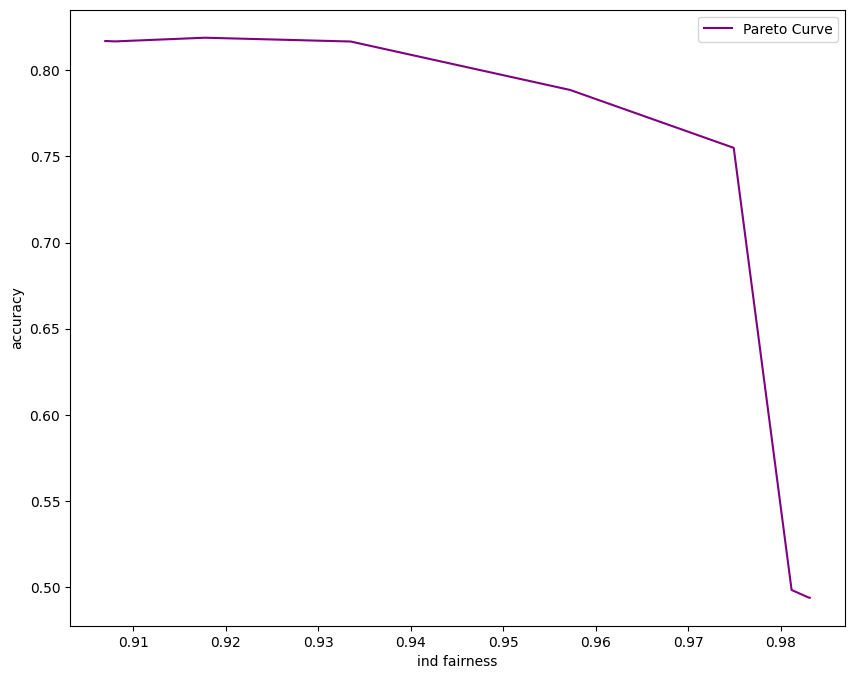

In [12]:
visualize_2d_results("exp9", labels=["accuracy", "ind fairness"])

# Comparing ind and group fairness vs acc

Here we compare how optimizing individual fairness differs from optimizing group fairness with respect to accuracy (it's exp2 vs exp8 plots essentially)

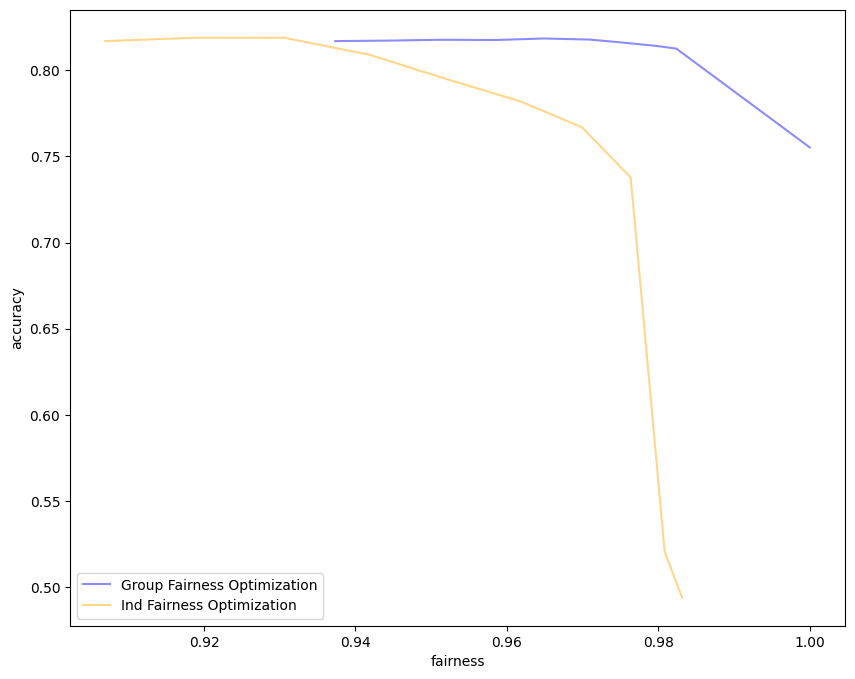

In [35]:
import numpy as np
fig = plt.figure(figsize = (10, 8))

group_fairness = get_exp_results("exp1")['result'][::-1]
plt.plot(group_fairness[0], group_fairness[1], label = "Group Fairness Optimization", color = 'blue', alpha=0.45)
ind_fairness = get_exp_results("exp8")['result'][::-1]
plt.plot(ind_fairness[0], ind_fairness[1], label = "Ind Fairness Optimization", color = 'orange', alpha=0.45)

plt.xlabel("fairness")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Analysis

We can see that adding group fairness does not substantially effect accuracy, while enforcing individual fairness has a dramatic effect

# Robustness vs Acc, 2d

# Exp 10

In [13]:
print_exp_info("exp10")

name:::exp10
descr:::Robustness vs Acc with 10 grid size
result#0:::[0.7551890034364261, 0.7894158075601375, 0.7551890034364261, 0.7613058419243985, 0.7675257731958762, 0.7612371134020618, 0.7662199312714776, 0.7612371134020618, 0.7702061855670103, 0.8169072164948453]
result#1:::[0.9999999999999645, -0.348492082049681, 0.9999999999999645, 0.6162313957765709, 0.2664084176874196, 0.6485552061543667, 0.5811774325391507, 0.651245470544939, 0.30917715186461175, -0.6158271354155161]


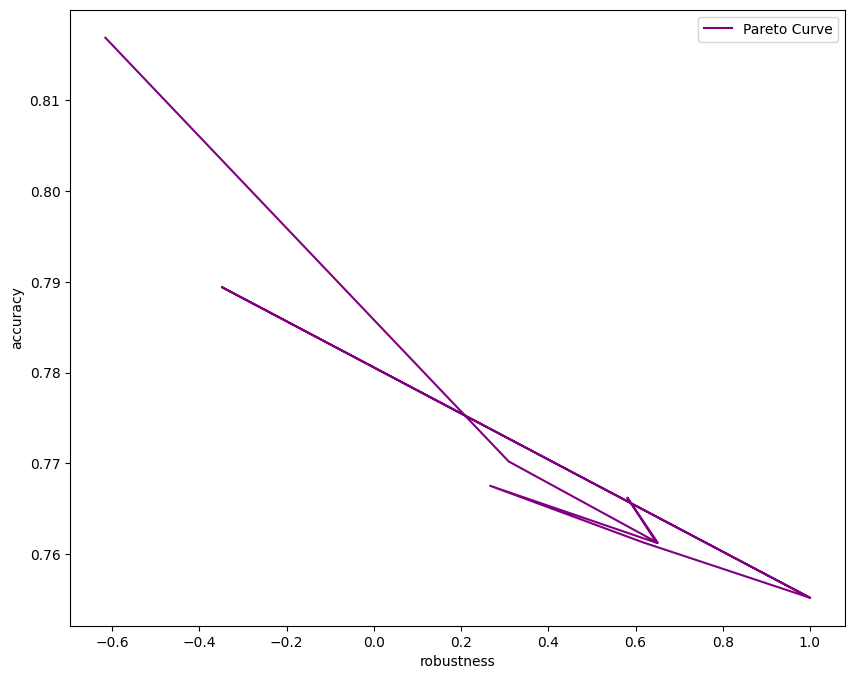

In [12]:
visualize_2d_results("exp10", labels=["accuracy", "robustness"])